<a href="https://colab.research.google.com/github/mardemes/education_sample/blob/master/Analisando_os_Dados_do_Airbnb_Munique_Bav%C3%A1ria_Alemanha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Blog Mardemes" width="15%" src="https://mardemes.files.wordpress.com/2017/03/keyboard-621831_960_720.jpg?w=300">

#### **Blog Mardemes**
*by [Mardemes](https://mardemes.wordpress.com)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Munique - 

---

Alemanha, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/germany/bv/munich/2020-04-25/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**
id - número de id gerado para identificar o imóvel

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dia

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36720,"Beautiful 2 rooms flat, Glockenbach",158413,Gabriela,NaN,Ludwigsvorstadt-Isarvorstadt,48.13057,11.56929,Entire home/apt,95,2,25,2017-07-22,0.34,1,0
1,49309,Sublet - Apartment with Balcony in Downtown (1),224802,Damien,NaN,Ludwigsvorstadt-Isarvorstadt,48.12456,11.55567,Private room,40,14,40,2017-10-15,0.34,1,364
2,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11476,11.48782,Entire home/apt,80,2,131,2019-10-03,1.26,2,229
3,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.11923,11.63726,Entire home/apt,95,1,53,2019-10-06,0.49,2,142
4,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15198,11.56486,Entire home/apt,120,2,84,2020-03-01,0.78,2,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11131
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

É possível ver que a coluna neighbourhood_group possui 100% dos seus valores faltantes.
As variáveis reviews_per_month e last_review possuem valores nulos em quase metade das linhas.
As variáveis name e host_name têm aproximadamente 0,1% dos valores nulos.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()  / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.237625
last_review                       0.237625
name                              0.001797
host_name                         0.000539
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, irei plotar o histograma.

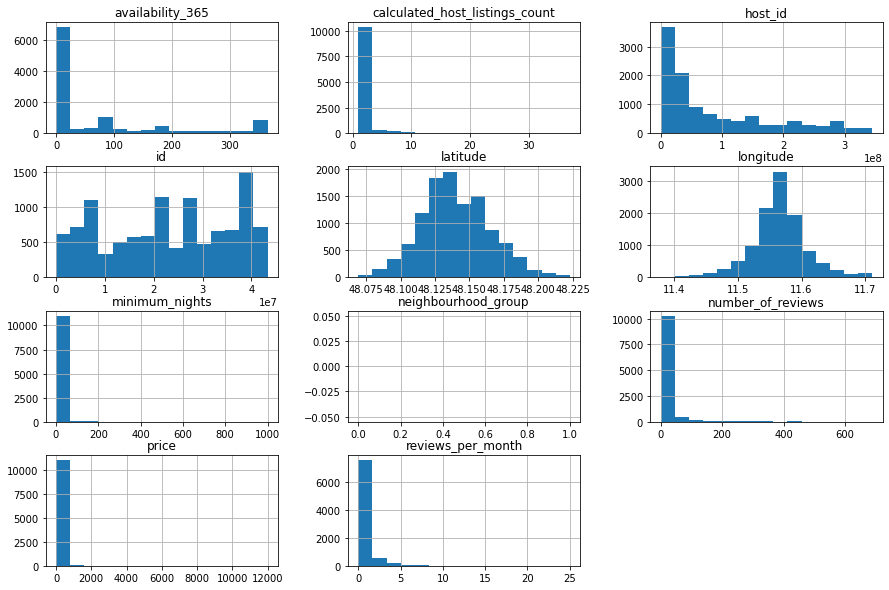

In [12]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Há outliers presentes?**




Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [13]:
#ver o resumo estatístico das variáveis numéricas:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11131.000000,11131.000000,11131.000000,8486.000000,11131.000000,11131.000000
mean,116.398796,5.561136,15.522235,0.711913,1.874674,72.847992
std,215.215258,25.361266,40.792679,1.161900,3.415468,114.588564
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,53.000000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,80.000000,2.000000,3.000000,0.320000,1.000000,0.000000
75%,128.000000,3.000000,12.000000,0.800000,1.000000,90.000000
max,12000.000000,1000.000000,688.000000,25.000000,37.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 632, porém seu valor máximo é 131727.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

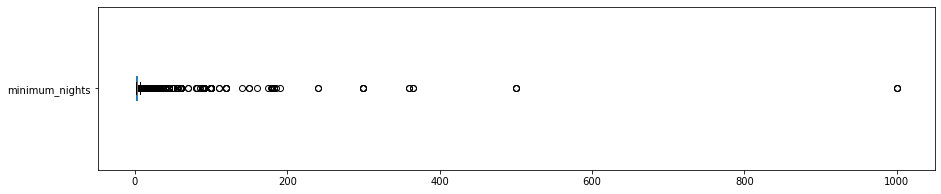

Minium_nights: Valores acima de 30 dias:
205 entradas
1.8417%


In [28]:
#mininum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#ver quantidade de valores acima de 30 dias para minium_nights
print("Minium_nights: Valores acima de 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30])/ df.shape[0])*100))
#print("{:.4f}%".format((len(df[df.minimum_nights > 30])/ df.shape[0])*100))

#### Boxplot para price

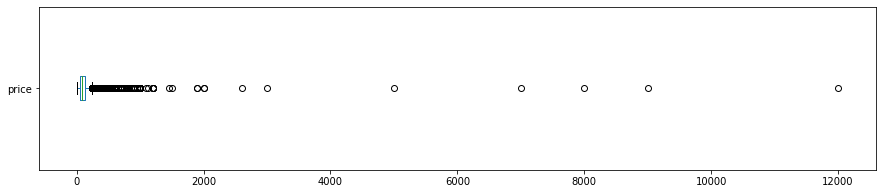


price: valores acima de 1500
11 entradas
0.0988%


In [38]:
#price
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()
#ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price >1500])))
print("{:.4f}%".format((len(df[df.price >1500]) / df.shape[0])*100))


#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

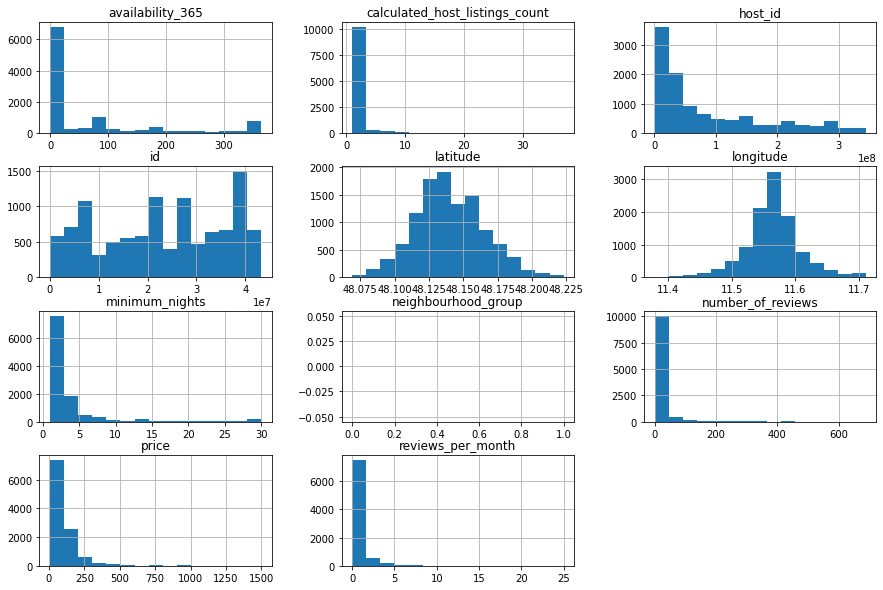

In [43]:
#remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights> 30].index, axis=0, inplace=True)

#remover 'neighbouhood_group', pois esta vazio
#df_clean.drop('neighbouhood_group', axis=1, inplace=True)
#plotar o histograma para as variaveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [0]:
# ver a média da coluna `price``


### **Q4. Qual a correlação existente entre as variáveis**

In [44]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)
# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.061620,-0.092553,-0.078820,0.003685,0.072810
minimum_nights,-0.061620,1.000000,-0.066248,-0.059283,0.295294,0.117461
number_of_reviews,-0.092553,-0.066248,1.000000,0.706801,0.084908,0.211424
reviews_per_month,-0.078820,-0.059283,0.706801,1.000000,0.124069,0.230334
calculated_host_listings_count,0.003685,0.295294,0.084908,0.124069,1.000000,0.254314
availability_365,0.072810,0.117461,0.211424,0.230334,0.254314,1.000000


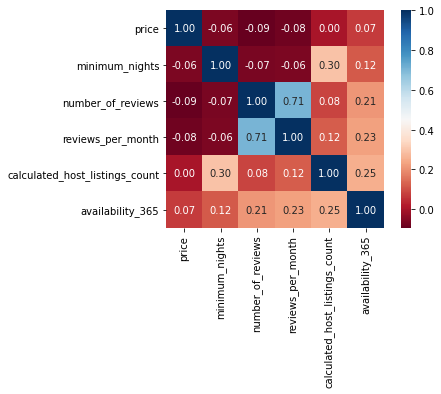

In [45]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [47]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    6139
Private room       4516
Shared room         182
Hotel room           78
Name: room_type, dtype: int64

In [48]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.562437
Private room       0.413743
Shared room        0.016674
Hotel room         0.007146
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Munique?**



In [54]:
# ver preço
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
#df_clean.head()

neighbourhood
Altstadt-Lehel                  162.501299
Ludwigsvorstadt-Isarvorstadt    140.856551
Schwanthalerhöhe                133.165888
Tudering-Riem                   125.597315
Maxvorstadt                     118.435272
Au-Haidhausen                   117.936975
Sendling                        115.141860
Sendling-Westpark               112.403794
Schwabing-West                  109.092365
Feldmoching-Hasenbergl          108.685185
Name: price, dtype: float64

In [0]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

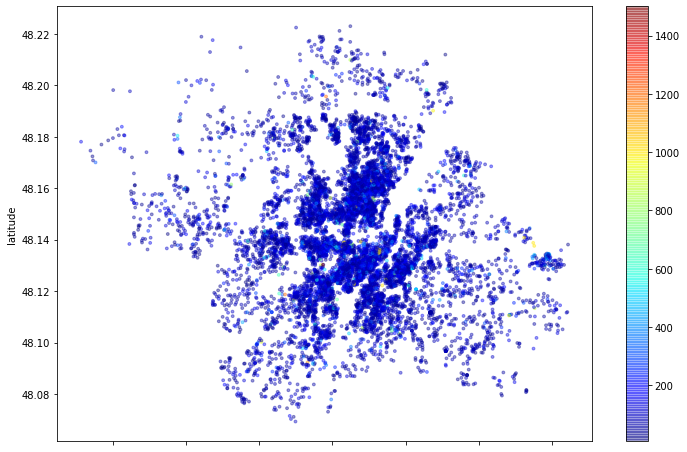

In [55]:
# ver a média da coluna `minimum_nights``
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))

## Conclusões
Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com bem mais atributos disponíveis.